In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [2]:
%cd gdrive/My\ Drive/model/
!ls

/content/gdrive/My Drive/model
model_skincancerdetection.h5  model_skincancerdetection.tflite


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [4]:
!ls
model_new = tf.keras.models.load_model("model_skincancerdetection.h5")

model_skincancerdetection.h5  model_skincancerdetection.tflite


In [5]:
%cd ../skin_cancer_detection/
!ls

/content/gdrive/MyDrive/skin_cancer_detection
'2 (1).jpg'		  dahi20.jpeg
'2 (2).jpg'		 'Folder tanpa nama'
'2 (3).jpg'		  model.h5
'2 (4).jpg'		  model_skincancerdetection.h5
'2 (5).jpg'		  model_skincancerdetection.hdf5
 2.jpg			  model_skincancerdetection.tflite
 33.jpg			  model.tflite
 3.jpg			  model_tl_json
 74.jpg			  rps_saved_model
 converted_model.tflite   train
'dahi1 (1).jpeg'	  validation
 dahi1.jpeg		 'WhatsApp Image 2022-05-25 at 10.47.10.jpeg'


In [6]:
dir_training = "train/"

training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

dir_validation = "validation/"

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	dir_training,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	dir_validation,
	target_size=(224,224),
	class_mode='categorical'
)


Found 2936 images belonging to 3 classes.
Found 738 images belonging to 3 classes.


In [7]:
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [8]:
model_new.evaluate(validation_generator)

24/24 [==============================] - 155s 6s/step - loss: 0.3848 - accuracy: 0.8482


[0.38475897908210754, 0.848238468170166]

Saving 4.jpg to 4.jpg


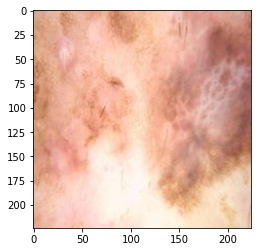

benign: 0.00%
[1.4503450e-05 9.9998546e-01 5.2334068e-26]
malignant: 100.00%
[1.4503450e-05 9.9998546e-01 5.2334068e-26]
normal: 0.00%
[1.4503450e-05 9.9998546e-01 5.2334068e-26]


In [9]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

labels = train_generator.class_indices.keys()

upload = files.upload()

for fn in upload.keys():
 
# Prediksi gambar

  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  i = model_new.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, i):
    print("{}: {:.2f}%".format(label, p * 100))
    print(i)